**Directions:** Use RBM to perform feature extraction on an image-based dataset that you find or create. If you go this route, present the features you extract and explain why this is a useful feature extraction method in the context you’re operating in. DO NOT USE either the MNIST digit recognition database or the iris data set. They’ve been worked on in very public ways very very many times and the code is easily available.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
from PIL import Image

In [3]:
import cv2
import os
import glob
img_dir = r"C:\Users\jesst\Downloads\yalefaces.zip\yalefaces" # Enter Directory of all images 
data_path = os.path.join(img_dir)
files = glob.glob(data_path)
data = []
for f1 in files:
    img = cv2.imread(f1)
    data.append(img)

In [4]:
mypath = r"C:\Users\jesst\Downloads\yalefaces"

In [5]:
from os import listdir
from os.path import isfile, join

In [6]:
import glob

images = [cv2.imread(file) for file in glob.glob(mypath)]

In [7]:
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = np.empty(len(onlyfiles), dtype=object)
images2 = []
for n in range(0, len(onlyfiles)):
    img = plt.imread( join(mypath,onlyfiles[n]) )
    images2.append(img)
    

In [8]:
images2

[array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 252, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 252, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 25

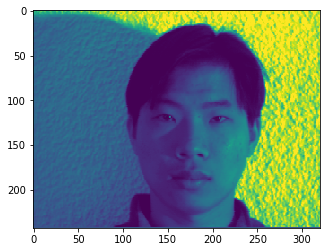

In [9]:
plt.imshow(images2[40])

In [10]:
np.shape(images2)

(166, 243, 320)

In [11]:
nsamples, nx, ny = np.shape(images2)

rbm_data = np.reshape(images2, (nsamples,nx*ny))

In [12]:
rbm_data

array([[130, 130, 130, ...,  68,  68,  68],
       [130, 130, 130, ...,  68,  68,  68],
       [130, 130, 130, ...,  68,  68,  68],
       ...,
       [130, 130, 130, ...,  68,  68,  68],
       [130, 130, 130, ...,  68,  68,  68],
       [130, 130, 130, ...,  68,  68,  68]], dtype=uint8)

In [13]:
rbm_data.shape

(166, 77760)

In [14]:
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression

In [15]:
rbm = BernoulliRBM(n_components=4)

In [16]:
rbm = rbm.fit(rbm_data)


In [17]:
rbm.components_.shape

(4, 77760)

In [18]:
rbm.components_

array([[ 2.07220213e+03,  2.07210191e+03,  2.07612502e+03, ...,
         1.13231527e+03,  1.13231049e+03,  1.13230783e+03],
       [-4.25650995e-02, -4.24642347e-02, -3.08599718e-02, ...,
        -4.80366130e-03, -2.76497062e-02, -1.06926577e-02],
       [ 2.08296392e+03,  2.08286225e+03,  2.08688511e+03, ...,
         1.13843538e+03,  1.13837698e+03,  1.13842111e+03],
       [ 2.07652098e+03,  2.07644032e+03,  2.08043496e+03, ...,
         1.13506209e+03,  1.13504985e+03,  1.13505004e+03]])

In [19]:
rbm.components_[0]

array([2072.20212988, 2072.10191041, 2076.12501817, ..., 1132.31527386,
       1132.31049357, 1132.3078292 ])

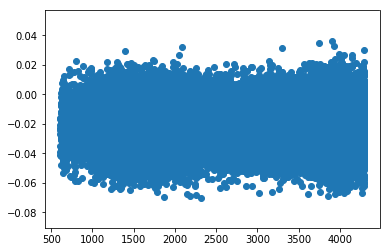

In [20]:
plt.scatter(rbm.components_[0], rbm.components_[1])

TypeError: Invalid dimensions for image data

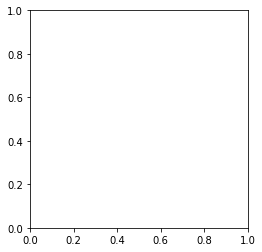

In [24]:
plt.imshow(rbm.components_[1])

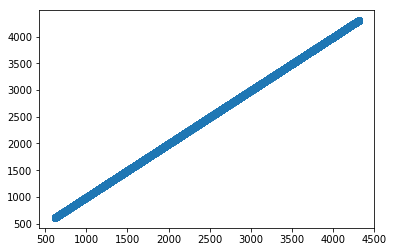

In [22]:
plt.scatter(rbm.components_[2], rbm.components_[3])

In [23]:
images2[40].shape

(243, 320)

In [25]:
rbm.components_[1].shape

(77760,)

In [27]:
a = np.reshape(rbm.components_[1], (-1,2))

In [28]:
a.shape

(38880, 2)

In [31]:
b = np.concatenate(rbm.components_[0], rbm.components_[1])

TypeError: only integer scalar arrays can be converted to a scalar index